In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

import warnings
warnings.filterwarnings("ignore")

In [4]:
import requests
from bs4 import BeautifulSoup


In [ ]:
df = pd.read_csv('/content/drive/My Drive/articleDesc.csv', sep='[@$@]{1,}', engine='python',error_bad_lines=False)

In [262]:
df

,Article Name,Vital Article,Level,Class,Importance,Topic,Wikiproject
0,Population_history_of_ancient_Egypt_Archive_8,NaN,NaN,NaN,NaN,NaN,None
1,Sin_Mirar_Atrás,NaN,NaN,NaN,NaN,NaN,None
2,RMWFC,NaN,NaN,NaN,NaN,NaN,None
3,Wilbur_E._Colyer,NaN,NaN,Stub,NaN,"['biography', 'military history', 'united stat...",None
4,Salmson_B.9,NaN,NaN,Start,NaN,NaN,None
...,...,...,...,...,...,...,...
6153223,I_Wanna_Hold_You,NaN,NaN,Stub,NaN,[],None
6153224,Setback_(architecture),NaN,NaN,NaN,NaN,"['architecture', 'urban studies and planning']",None
6153225,China_and_the_World_Trade_Organization,NaN,NaN,Start,NaN,['china'],None
6153226,Jan_de_Vries_(athlete),NaN,NaN,Stub,NaN,"['running', 'olympics', 'biography', 'netherla...",None


In [6]:
df.shape

(6153228, 7)

In [7]:
df.columns

Index(['Article Name', 'Vital Article', 'Level', 'Class', 'Importance',
       'Topic', 'Wikiproject'],
      dtype='object')

In [ ]:
df.dtypes

Article Name     object
Vital Article    object
Level            object
Class            object
Importance       object
Topic            object
Wikiproject      object
dtype: object

In [ ]:
df.isnull().sum()

Article Name           0
Vital Article    6116145
Level            6116540
Class            1840662
Importance       6116408
Topic            1886187
Wikiproject      6147568
dtype: int64

In [263]:
df=df[~(df["Article Name"].isnull())]

**Taking the Featured Articles List from given dataset::**

In [264]:
df1=df[df["Class"]=="FA"]

In [ ]:
df1.shape

(5386, 7)

**Scraping Length of content,Categories,section,unique references,External links,Total of Edits and Editors from wikipedia using Beautifulsoup.**

In [ ]:
Content_length=[]
Num_sections=[]
Summary=[]
Unique_references=[]
Categories=[]
Edit_date=[]
Language=[]
Link=[]
Total_edits=[]
Editors=[]


urls=df1["Article Name"].tolist()
for urls in urls:
      url = "https://en.wikipedia.org/wiki/"+urls
      print(url)
      response = requests.get(url)
      content = response.content
      soup = BeautifulSoup(content, "html.parser")
      content_length = len(soup.get_text())
      num_sections = len(soup.find_all("span", {"class": "mw-headline"}))
      unique_references = len(soup.find_all("span", {"class":"mw-cite-backlink"}))
      categories = len(soup.find_all("div", {"class": "catlinks"})[0].find_all("li"))
      menu_heading = soup.find('div', {'id': 'p-lang-btn'})
      language = ""
      edit_date = ""
      try:
        language = menu_heading.find('span', {'class': 'vector-menu-heading-label'}).get_text()
      except AttributeError:
        pass
      
      try:
        edit_date = soup.find("li", {"id": "footer-info-lastmod"}).get_text()
      except AttributeError:
        pass
      link = len(soup.find_all("a", {"class":"external text"}))

      params = {
          "action": "query",
          "prop": "revisions",
          "rvprop": "user",
          "format": "json",
          "titles": urls,
          "rvlimit": "max"
               }
      response = requests.get("https://en.wikipedia.org/w/api.php", params=params)
      data = response.json()

      try:
          page_id = next(iter(data["query"]["pages"]))
          revisions = data["query"]["pages"][page_id]["revisions"]
          total_edits = len(revisions)
          editors = len(set([revision["user"] for revision in revisions]))
      except KeyError:
          print("Error: Page not found.")
          total_edits = 0
          editors = 0
      Content_length.append(content_length)
      Num_sections.append(num_sections)
      Summary.append(summary)
      Unique_references.append(unique_references)
      Categories.append(categories)
      Edit_date.append(edit_date)
      Language.append(language)
      Link.append(link)
      Total_edits.append(total_edits)
      Editors.append(editors)



In [ ]:
df1_sample=pd.DataFrame(list(zip(Content_length,Num_sections,Unique_references,Categories,Edit_date,Language,Link,Total_edits,Editors)),
                        columns=["content_length", "num_sections", "unique_references", "Categories", "edit_date", "Language", "link","Total_edits","Editors"])
df1_sample.to_csv("df1_features.csv",index=False)

In [265]:
df=df[~(df["Class"]=="FA")]

In [266]:
df=df[~(df["Level"].isnull() | df["Class"].isnull() | df["Importance"].isnull() | df["Topic"].isnull())]

In [ ]:
df

,Article Name,Vital Article,Level,Class,Importance,Topic,Wikiproject
107,Siege_of_Baghdad_(1258),Yes,5,C,History,"['iraq', 'mongols']",None
348,West_Midlands_(county),Yes,5,Start,Geography,"['uk geography', 'england', 'west midlands']",None
480,Philosophy,Yes,1,C,Philosophy,['philosophy'],None
610,Lake_Okeechobee,Yes,5,Start,Geography,['florida'],None
818,Kurbat_Ivanov,Yes,5,Start,People,"['biography', 'russia', 'geography']",None
...,...,...,...,...,...,...,...
6151814,Very_Large_Array,Yes,5,B,Technology,"['united states', 'astronomy', 'physics']",None
6151980,Braga,Yes,5,Start,Geography,['portugal'],None
6152045,Neuron,Yes,4,B,Biology,"['neuroscience', 'biology', 'molecular and cel...",None
6152231,Bhagat_Singh,Yes,5,B,People,"['india', 'pakistan', 'biography', 'military h...",None


In [ ]:
df.shape

(28564, 4)

In [ ]:
df.isnull().sum()

Article Name         0
Vital Article        0
Level                0
Class                0
Importance           0
Topic                0
Wikiproject      28563
dtype: int64

**Taking samples for non-featured articles from the given dataset.**

In [267]:
from random import sample
df2=df.sample(n=5500,replace=False,ignore_index=True)
df2.to_csv("df2.csv")

In [ ]:
Content_length=[]
Num_sections=[]
Unique_references=[]
Categories=[]
Edit_date=[]
Language=[]
Link=[]
Total_edits=[]
Editors=[]


urls=df2["Article Name"].tolist()
for urls in urls:
      url = "https://en.wikipedia.org/wiki/"+urls
      print(url)
      response = requests.get(url)
      content = response.content
      soup = BeautifulSoup(content, "html.parser")
      content_length = len(soup.get_text())
      num_sections = len(soup.find_all("span", {"class": "mw-headline"}))
      unique_references = len(soup.find_all("span", {"class":"mw-cite-backlink"}))
      categories = len(soup.find_all("div", {"class": "catlinks"})[0].find_all("li"))
      menu_heading = soup.find('div', {'id': 'p-lang-btn'})
      language = ""
      edit_date = ""
      try:
        language = menu_heading.find('span', {'class': 'vector-menu-heading-label'}).get_text()
      except AttributeError:
        pass
      
      try:
        edit_date = soup.find("li", {"id": "footer-info-lastmod"}).get_text()
      except AttributeError:
        pass
      link = len(soup.find_all("a", {"class":"external text"}))

      params = {
          "action": "query",
          "prop": "revisions",
          "rvprop": "user",
          "format": "json",
          "titles": urls,
          "rvlimit": "max"
               }
      response = requests.get("https://en.wikipedia.org/w/api.php", params=params)
      data = response.json()

      try:
          page_id = next(iter(data["query"]["pages"]))
          revisions = data["query"]["pages"][page_id]["revisions"]
          total_edits = len(revisions)
          editors = len(set([revision["user"] for revision in revisions]))
      except KeyError:
          print("Error: Page not found.")
          total_edits = 0
          editors = 0
      Content_length.append(content_length)
      Num_sections.append(num_sections)
      Unique_references.append(unique_references)
      Categories.append(categories)
      Edit_date.append(edit_date)
      Language.append(language)
      Link.append(link)
      Total_edits.append(total_edits)
      Editors.append(editors)

In [269]:
df2_sample=pd.DataFrame(list(zip(Content_length,Num_sections,Unique_references,Categories,Edit_date,Language,Link,Total_edits,Editors)),
                        columns=["content_length", "num_sections", "unique_references", "Categories", "edit_date", "Language", "link","Total_edits","Editors"])
df2_sample.to_csv("df2_features1.csv",index=False)

In [271]:
df1_features=pd.read_csv("df1_features.csv")
df2_features=pd.read_csv("df2_features1.csv")
df3=pd.concat([df1_features,df2_features],axis=0,ignore_index=True)
df3

,content_length,num_sections,unique_references,Categories,edit_date,Language,link,Total_edits,Editors
0,101104,32,96,10,This page was last edited on 13 February 2023...,38 languages,40,500,304
1,163727,36,390,46,"This page was last edited on 11 March 2023, a...",175 languages,592,500,207
2,150330,41,432,48,"This page was last edited on 10 March 2023, a...",68 languages,88,500,234
3,133357,63,162,36,"This page was last edited on 7 March 2023, at...",39 languages,279,500,215
4,191285,33,453,57,"This page was last edited on 9 March 2023, at...",42 languages,564,500,176
...,...,...,...,...,...,...,...,...,...
10881,43644,17,28,11,This page was last edited on 30 December 2022...,86 languages,38,500,305
10882,40701,9,32,40,"This page was last edited on 8 March 2023, at...",40 languages,30,227,139
10883,134502,33,208,31,This page was last edited on 25 February 2023...,120 languages,590,500,256
10884,55050,11,41,59,"This page was last edited on 20 January 2023,...",48 languages,60,500,252


In [272]:
df4=pd.concat([df1,df2],axis=0,ignore_index=True)
df4

,Article Name,Vital Article,Level,Class,Importance,Topic,Wikiproject
0,History_of_biology,Yes,4,FA,History,"['history of science', 'biology', 'palaeontolo...",None
1,Canberra,Yes,4,FA,Geography,"['australia', 'cities']",None
2,Edward_II_of_England,Yes,5,FA,People,"['biography', 'military history', 'england', '...",None
3,MTR,Yes,5,FA,Technology,[],None
4,CM_Punk,NaN,NaN,FA,NaN,"['biography', 'professional wrestling', 'mixed...",None
...,...,...,...,...,...,...,...
10881,Antelope,Yes,4,C}}{{WikiProject Mammals,Biology,"['mammals', 'africa']",None
10882,Abel_Gance,Yes,5,Start,People,"['biography', 'france']",None
10883,Antibiotic,Yes,3,C,Health and Medicine,"['pharmacology ', 'microbiology ', 'molecular ...",None
10884,Seán_MacBride,Yes,5,C,People,"['banner shell', 'ireland', 'biography', 'iris...",None


In [273]:
df_new=pd.concat([df4,df3],axis=1,ignore_index=True)
df_new.columns=["Article Name", "Vital Article", "Level", "Class", "Importance",
       "Topic", "Wikiproject","content_length", "num_sections", "unique_references", "Categories", "edit_date", "Language", "link","Total_edits","Editors"]
df_new.to_csv("wikipedia.csv",index=False)

**Merging both featured and non_featured samples as the new dataset for ML Project**

In [274]:
df=pd.read_csv("wikipedia.csv")
df.head()

,Article Name,Vital Article,Level,Class,Importance,Topic,Wikiproject,content_length,num_sections,unique_references,Categories,edit_date,Language,link,Total_edits,Editors
0,History_of_biology,Yes,4.0,FA,History,"['history of science', 'biology', 'palaeontolo...",NaN,101104,32,96,10,This page was last edited on 13 February 2023...,38 languages,40,500,304
1,Canberra,Yes,4.0,FA,Geography,"['australia', 'cities']",NaN,163727,36,390,46,"This page was last edited on 11 March 2023, a...",175 languages,592,500,207
2,Edward_II_of_England,Yes,5.0,FA,People,"['biography', 'military history', 'england', '...",NaN,150330,41,432,48,"This page was last edited on 10 March 2023, a...",68 languages,88,500,234
3,MTR,Yes,5.0,FA,Technology,[],NaN,133357,63,162,36,"This page was last edited on 7 March 2023, at...",39 languages,279,500,215
4,CM_Punk,NaN,NaN,FA,NaN,"['biography', 'professional wrestling', 'mixed...",NaN,191285,33,453,57,"This page was last edited on 9 March 2023, at...",42 languages,564,500,176


In [275]:
df.isnull().sum()

Article Name             0
Vital Article         4400
Level                 4400
Class                    0
Importance            4400
Topic                  294
Wikiproject          10886
content_length           0
num_sections             0
unique_references        0
Categories               0
edit_date               43
Language                43
link                     0
Total_edits              0
Editors                  0
dtype: int64

**Data Cleaning**

In [276]:
df.drop(["Vital Article","Wikiproject","Importance"],axis=1,inplace=True)

In [277]:
df=df[~(df["Topic"].isnull() | df["edit_date"].isnull() | df["Language"].isnull())]

In [278]:
df.isnull().sum()

Article Name            0
Level                4137
Class                   0
Topic                   0
content_length          0
num_sections            0
unique_references       0
Categories              0
edit_date               0
Language                0
link                    0
Total_edits             0
Editors                 0
dtype: int64

In [280]:
df.shape

(10559, 13)

In [281]:
df.dtypes

Article Name          object
Level                float64
Class                 object
Topic                 object
content_length         int64
num_sections           int64
unique_references      int64
Categories             int64
edit_date             object
Language              object
link                   int64
Total_edits            int64
Editors                int64
dtype: object

In [286]:
df["Class"].unique()

array(['FA', 'B', 'C', 'Start', 'GA', 'Stub', 'start', 'A', ' B', 'List',
       'C ', ' C', 'Start}}{{WikiProject Food and drink',
       'B}}{{WikiProject Africa', 'C}}{{WikiProject Italy',
       'Start}}{{WikiProject Biography', 'c', ' FA', 'Unassessed',
       'FA}}{{WikiProject Biography', 'B ', 'C}}{{WikiProject Plants ',
       'b', '{{WikiProject Classical Greece and Rome',
       'C}}{{WikiProject Greece', 'start ', 'B}}{{WikiProject Biography',
       'GA}}{{WikiProject Cities', 'B}}{{WikiProject Roots music', 'list',
       'c ', ' start}}{{WikiProject Chemistry', 'stub',
       'C}}{{WikiProject National Register of Historic Places ',
       'start}}{{WikiProject Mexico', ' B ',
       'c}}{{WikiProject Philosophy', 'B}}{{WikiProject Universities',
       'start}}{{WikiProject Southeast Asia',
       'B}}{{WikiProject Norse history and culture',
       'C}}{{WikiProject Education', 'C}}{{WikiProject Former countries',
       'Start ', ' Start', 'Start}}{{WikiProject Textil

In [287]:
def Classcorrection(text):
  lis=['FA', 'B', 'START', 'C', 'STUB', 'GA', 'FL','A','LIST','SL','SIA','NA']
  text=re.sub(r"[^\w+]"," ",text)
  words=text.split()
  print(words)
  for word in words:
    if word.upper() in lis:
      return word

In [ ]:
df["Class"]=df["Class"].apply(Classcorrection)

In [289]:
df["Class"].unique()

array(['FA', 'B', 'C', 'Start', 'GA', 'Stub', 'start', 'A', 'List', 'c',
       None, 'b', 'list', 'stub'], dtype=object)

In [290]:
df["Class"]=df["Class"].replace({'FA':0,'B':1,'Start':1,'C':1,'Stub':1,'GA':1,'b':1,'start':1,'List':1,'c':1,'A':1,'stub':1,'ga':1,'None':1,'list':1})

In [309]:
df = df.dropna(subset=["Class"])

In [319]:
df["Class"]=df["Class"].astype("int")

In [334]:
df["Level"].unique()

array([ 4.,  5., nan,  3.,  2.,  1.])

In [335]:
df.groupby("Class")["Level"].value_counts()

Class  Level
0      5.0       486
       4.0       365
       3.0        81
       2.0         4
       1.0         1
1      5.0      3777
       4.0      1549
       3.0       133
       2.0        21
       1.0         1
Name: Level, dtype: int64

In [324]:
missing_level=df[df["Level"].isna()]
missing_level["Class"].value_counts()

0    4137
Name: Class, dtype: int64

In [349]:
df.loc[(df["unique_references"] <=50) & (df["Level"].isna()), "Level"] = 2
df.loc[(df["unique_references"] >50) & (df["unique_references"] <=80) & (df["Level"].isna()), "Level"] = 3
df.loc[(df["unique_references"] >80) & (df["unique_references"] <=130) & (df["Level"].isna()), "Level"] = 4
df.loc[(df["unique_references"] >130)& (df["Level"].isna()), "Level"] = 5

In [350]:
df.groupby("Class")["Level"].value_counts()

Class  Level
0      2        1447
       4        1319
       5        1182
       3        1125
       1           1
1      5        3777
       4        1549
       3         133
       2          21
       1           1
Name: Level, dtype: int64

<AxesSubplot:xlabel='Level', ylabel='count'>

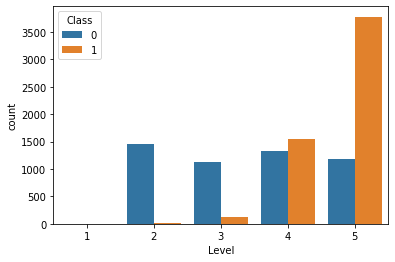

In [351]:
sns.countplot(df["Level"],hue=df["Class"])

In [352]:
df["Level"]=df["Level"].astype("int")

In [353]:
pattern = r'(\d+)'
df["Language"]=df["Language"].str.extract(pattern,expand=False)
df=df[~(df["Language"].isnull())]
df["Language"]=df["Language"].astype("int")


In [364]:
def Extractdate(text):
  regex = r'\b\d{1,2}\s+[A-Za-z]+\s+\d{4}\b'
  match = re.search(regex, text)
  date_str = match.group(0)
  return date_str

In [382]:
df["edit_date"]=df["edit_date"].apply(Extractdate)
df["LastEditDate"]=pd.to_datetime(df["edit_date"])

In [383]:
df["LastEdityear"]=df["LastEditDate"].dt.year

In [384]:
from datetime import date
def DaySinceLastEdit(text):
  today=date.today()
  delta=today-text
  return delta.days

In [385]:
df["LastEditDate"]=pd.to_datetime(df["edit_date"]).dt.date
df["DaySinceLastEdit"]=df["LastEditDate"].apply(DaySinceLastEdit)

In [386]:
def topiccorrection(text):
  t=re.sub(r"[^\w+\s]","",text)
  return t

In [387]:
df["Topic"]=df["Topic"].apply(topiccorrection)

In [388]:
df.dtypes

Article Name         object
Level                 int64
Class                 int64
Topic                object
content_length        int64
num_sections          int64
unique_references     int64
Categories            int64
edit_date            object
Language              int64
link                  int64
Total_edits           int64
Editors               int64
LastEditDate         object
LastEdityear          int64
DaySinceLastEdit      int64
dtype: object

In [389]:
df.drop(["Article Name","edit_date","LastEditDate"],axis=1,inplace=True)

In [391]:
df.to_csv("Cleanwikidata.csv",index=False)

**EDA**

In [435]:
df=pd.read_csv("Cleanwikidata.csv")

In [422]:
df.describe()

,Level,Class,content_length,num_sections,unique_references,Categories,Language,link,Total_edits,Editors,LastEdityear,DaySinceLastEdit
count,10448.000000,10448.000000,10448.000000,10448.000000,10448.000000,10448.000000,10448.000000,10448.000000,10448.000000,10448.000000,10448.000000,10448.000000
mean,4.075517,0.521918,71580.990716,19.331355,88.714299,31.354613,41.270482,108.856049,428.811543,190.785701,2022.795463,49.586524
std,1.066445,0.499543,40347.273929,17.176361,85.493134,21.111085,40.932541,125.257772,132.994427,82.942804,0.428691,83.940087
min,1.000000,0.000000,9082.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2019.000000,0.000000
25%,3.000000,0.000000,43520.000000,11.000000,32.000000,16.000000,11.000000,34.000000,413.000000,125.000000,2023.000000,6.000000
50%,4.000000,1.000000,60745.500000,16.000000,62.000000,25.000000,30.000000,67.000000,500.000000,205.000000,2023.000000,19.000000
75%,5.000000,1.000000,87935.250000,25.000000,119.000000,41.000000,58.000000,133.000000,500.000000,259.000000,2023.000000,52.000000
max,5.000000,1.000000,430941.000000,1256.000000,752.000000,179.000000,312.000000,1499.000000,500.000000,375.000000,2023.000000,1215.000000


In [476]:
df=df.dropna(subset=["Topic"])

In [423]:
df.columns

Index(['Level', 'Class', 'Topic', 'content_length', 'num_sections',
       'unique_references', 'Categories', 'Language', 'link', 'Total_edits',
       'Editors', 'LastEdityear', 'DaySinceLastEdit'],
      dtype='object')

<AxesSubplot:xlabel='content_length'>

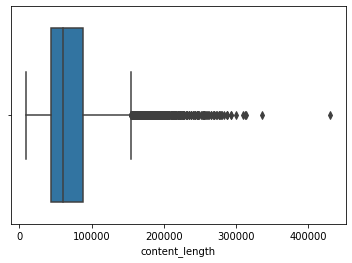

In [424]:
sns.boxplot(df["content_length"])

<AxesSubplot:xlabel='unique_references'>

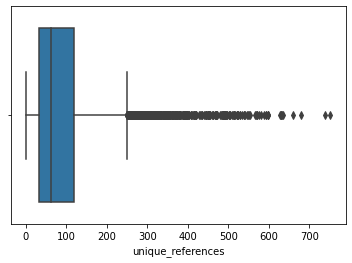

In [401]:
sns.boxplot(df["unique_references"])

<AxesSubplot:xlabel='num_sections'>

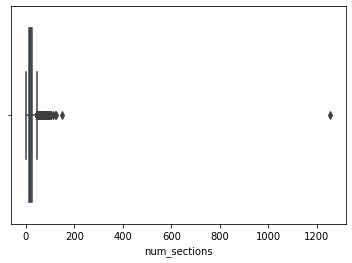

In [400]:
sns.boxplot(df["num_sections"])

In [477]:
def find_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.0001)
    Q3 = df[col_name].quantile(0.80)
    IQR = Q3-Q1
    fence_low  = Q1-1.5*IQR
    fence_high = Q3+1.5*IQR
    outlier_list=((df[col_name] <= fence_low) | (df[col_name] >= fence_high)).tolist()
    outlier_indexes=[i for i, x in enumerate(outlier_list) if x]
    return outlier_indexes

In [478]:
bad_indexes=[]
columns=['content_length','num_sections', 'unique_references', 'Categories', 'Language','Editors','DaySinceLastEdit']
for col in columns:
    if df[col].dtype in ["int64", "float64"]:
        outlierindexes= find_outliers(df, col)
        bad_indexes.extend(outlierindexes)
print(f"All Bad indexes:{bad_indexes}") 

All Bad indexes:[523, 6296, 7541, 4477, 4651, 5039, 5387, 6550, 6887, 7095, 8027, 8668, 18, 244, 332, 446, 659, 758, 776, 1104, 1106, 1236, 1399, 1574, 1691, 1815, 2160, 2233, 2273, 2386, 2714, 2835, 3131, 3200, 3263, 3264, 4518, 5006, 5098, 5203, 5829, 5938, 6347, 6468, 6814, 7234, 8044, 8081, 8271, 8468, 8965, 215, 610, 4666, 5129, 5582, 6661, 6881, 7099, 7709, 1438, 1993, 2996, 3493, 3593, 3884, 4670, 5167, 6089, 6105, 6491, 6869, 7023, 7110, 7285, 7427, 7666, 46, 72, 94, 119, 122, 127, 138, 204, 218, 226, 229, 254, 264, 275, 310, 328, 357, 377, 379, 401, 405, 406, 418, 422, 457, 479, 491, 528, 535, 553, 558, 561, 572, 578, 589, 607, 611, 628, 679, 695, 724, 744, 753, 755, 765, 815, 829, 859, 904, 908, 918, 919, 926, 933, 962, 968, 978, 992, 1008, 1024, 1036, 1056, 1064, 1103, 1107, 1116, 1121, 1141, 1151, 1157, 1187, 1230, 1254, 1256, 1262, 1280, 1299, 1306, 1309, 1311, 1353, 1378, 1388, 1396, 1412, 1419, 1437, 1440, 1465, 1468, 1490, 1514, 1530, 1545, 1546, 1577, 1588, 1684, 1714,

In [479]:
unique=set(bad_indexes)
uniqlist=list(unique)

In [480]:
h=df.loc[df.index[uniqlist]]
h["Class"].value_counts()

0    282
1    137
Name: Class, dtype: int64

In [481]:
df = df.drop(df.index[uniqlist])

In [482]:
df.shape

(8740, 13)

In [483]:
df["Class"].value_counts()

1    4858
0    3882
Name: Class, dtype: int64

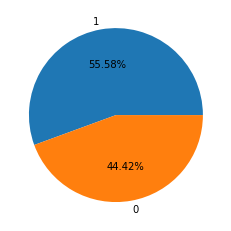

In [484]:
counts =df["Class"].value_counts()
plt.pie(counts.values,autopct="%.2f%%",labels=counts.index)
plt.show()

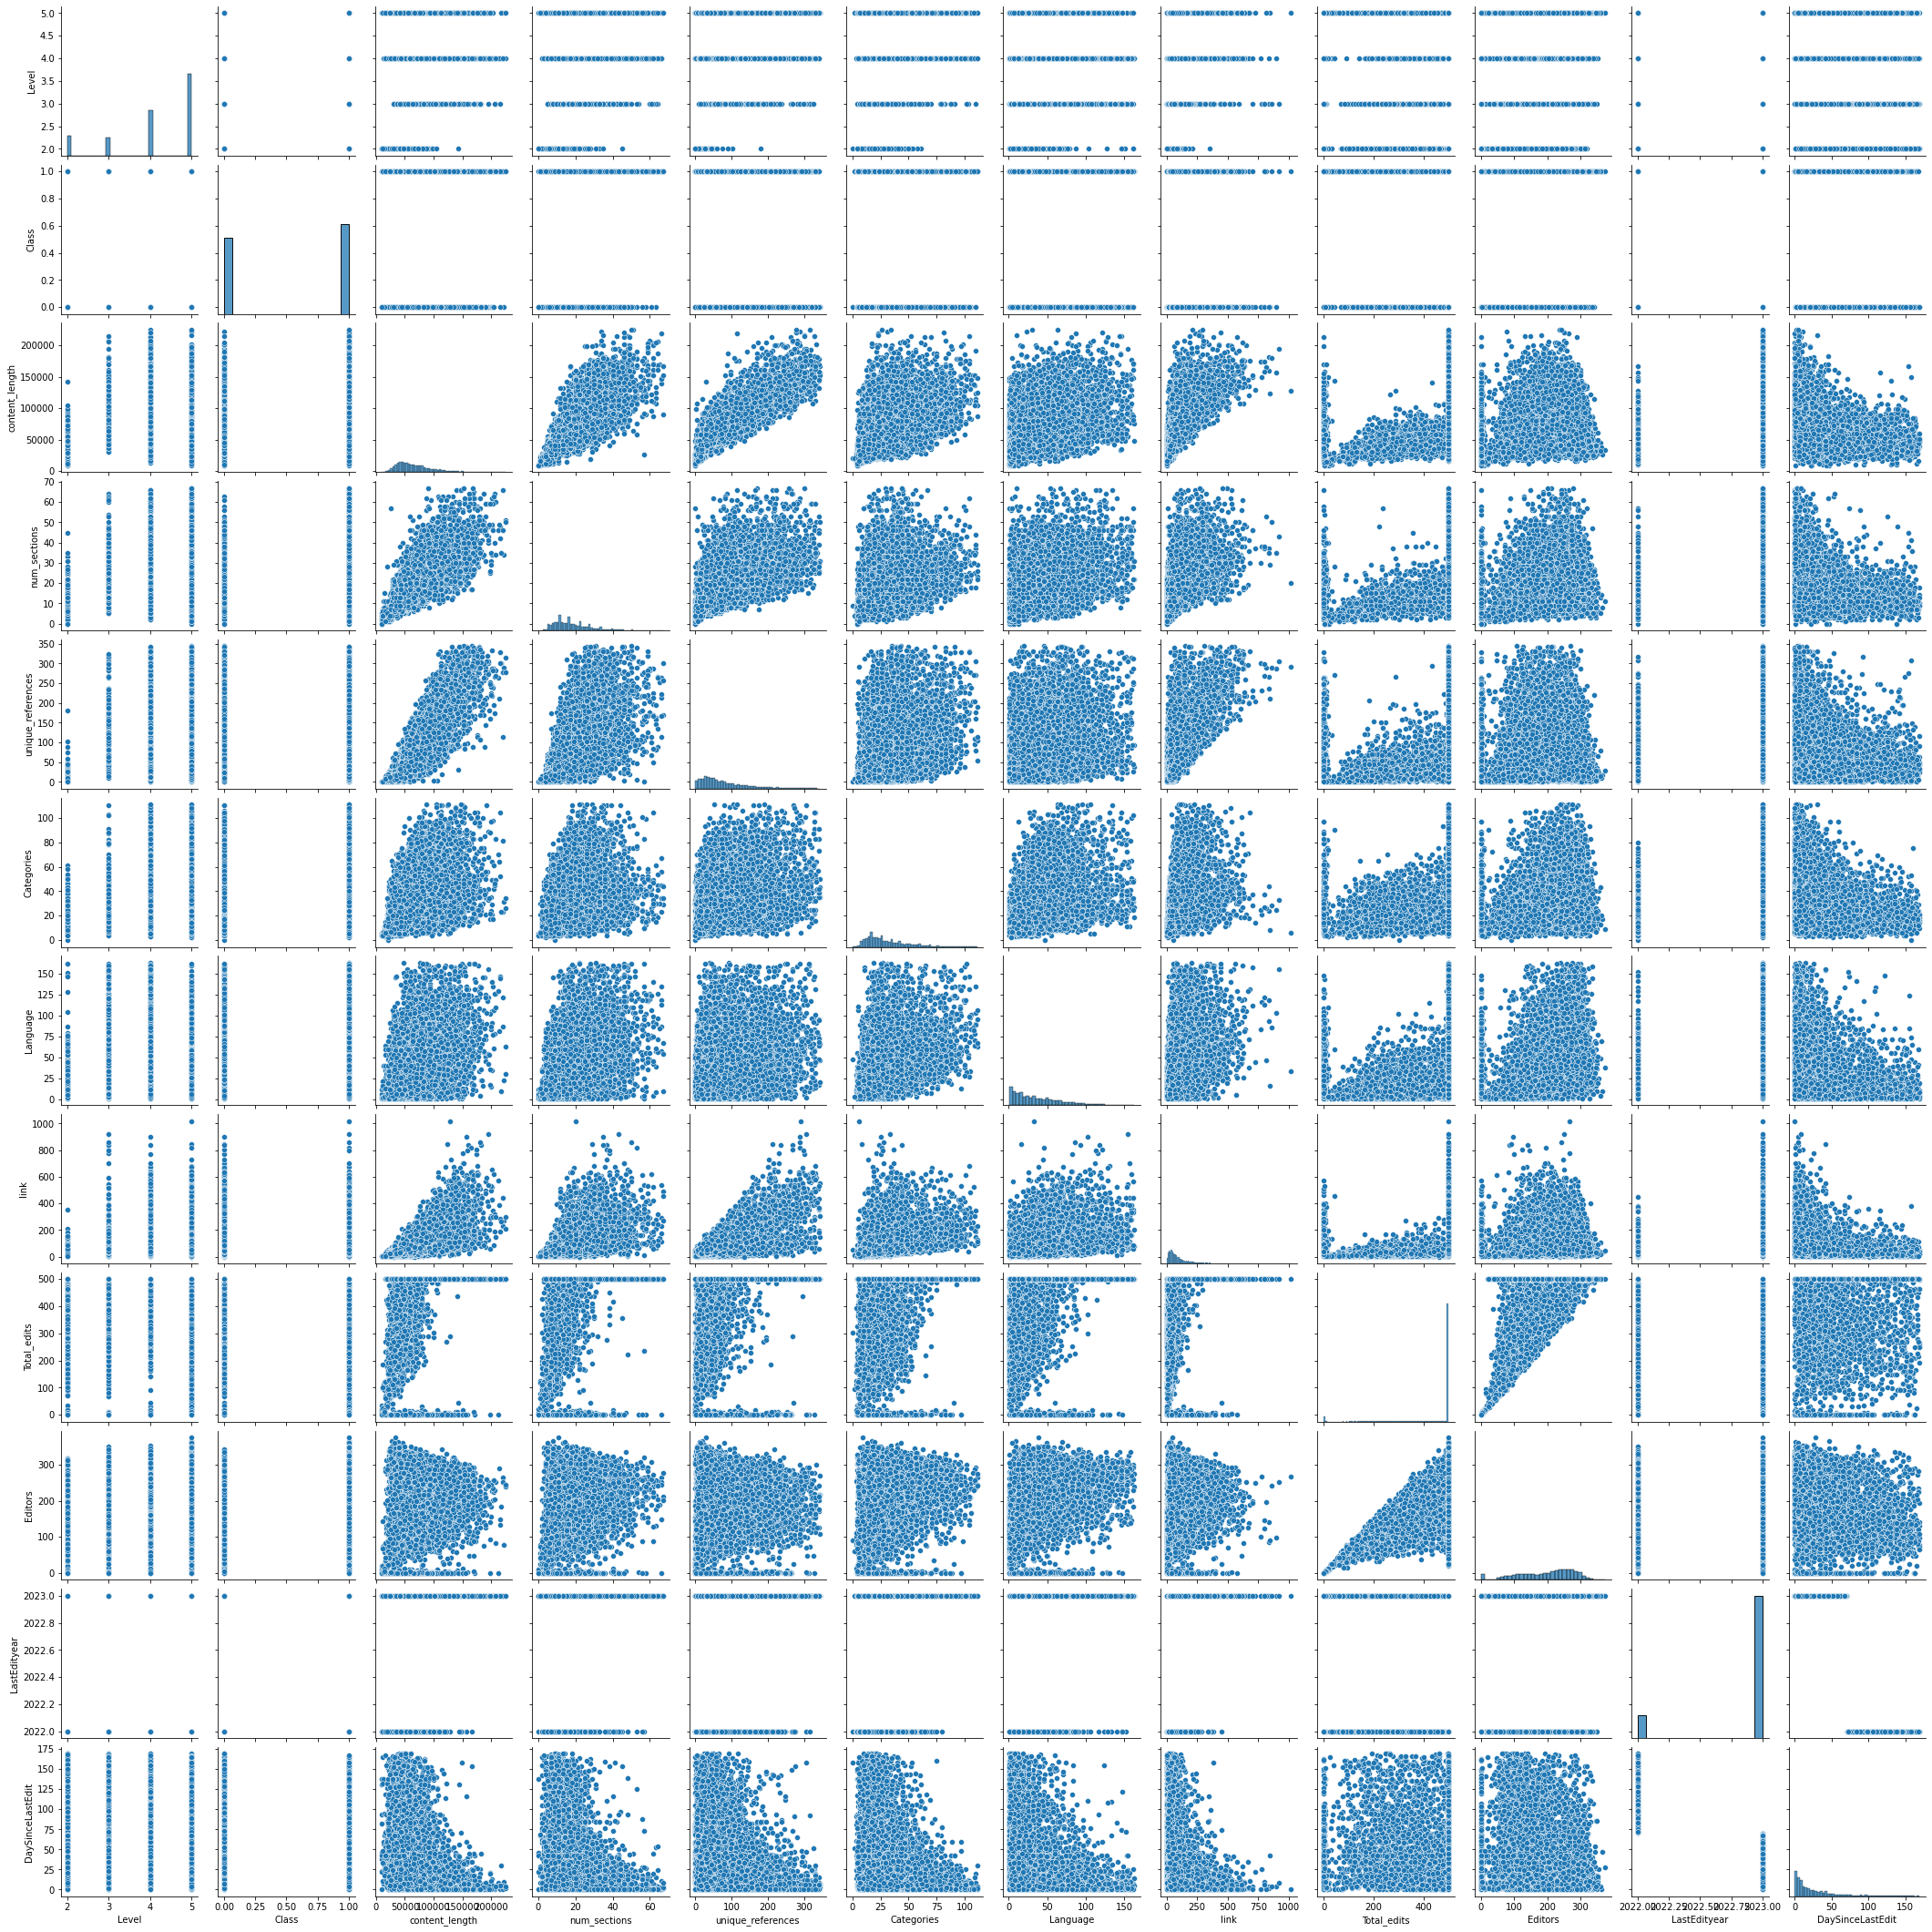

In [420]:
sns.pairplot(df)

**Feature Selection**

<AxesSubplot:>

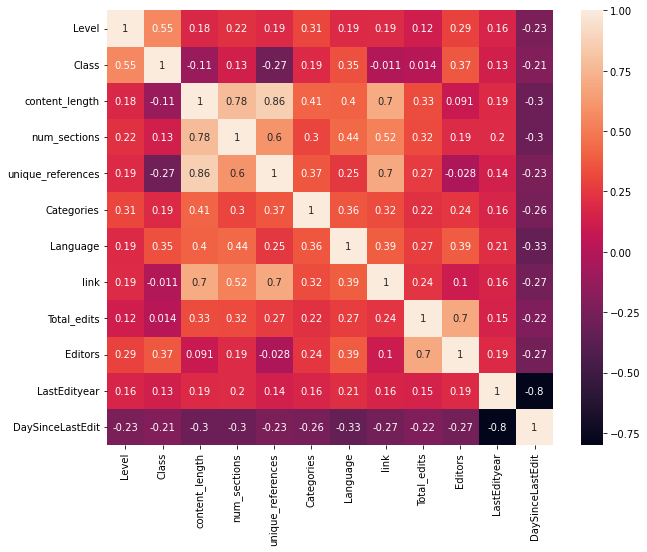

In [485]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True)

In [582]:
x=df[['Level', 'content_length', 'num_sections',
       'unique_references', 'Categories', 'Language', 'link', 'Total_edits',
       'Editors', 'LastEdityear', 'DaySinceLastEdit']]
y=df["Class"]

In [583]:
df.columns

Index(['Level', 'Class', 'Topic', 'content_length', 'num_sections',
       'unique_references', 'Categories', 'Language', 'link', 'Total_edits',
       'Editors', 'LastEdityear', 'DaySinceLastEdit'],
      dtype='object')

In [584]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [585]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(8,'Score'))

                Specs         Score
1      content_length  1.619667e+06
8             Editors  3.943949e+04
3   unique_references  3.494375e+04
5            Language  2.716716e+04
10   DaySinceLastEdit  1.184917e+04
4          Categories  3.704366e+03
2        num_sections  8.375195e+02
0               Level  6.388251e+02


from both selection methods 'Level', 'num_sections','unique_references', 'Categories', 'Language','DaySinceLastEdit' are seems to be important features.

**Training with all the features**

In [587]:
x=df.drop(["Class"],axis=1)
y=df["Class"].values

In [588]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y)

In [571]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

get_text_data = FunctionTransformer(lambda x: x['Topic'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[['Level', 'content_length', 'num_sections',
       'unique_references', 'Categories', 'Language', 'link', 'Total_edits',
       'Editors', 'LastEdityear', 'DaySinceLastEdit']], validate=False)
     

### SVM

In [576]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('std',StandardScaler())
            ])),
             ('text1_features', Pipeline([
                ('selector', get_text_data),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', SVC(probability=True))
])


In [577]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f799c6d10d0>)),
                                                                 ('std',
                                                                  StandardScaler())])),
                                                ('text1_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f799c1dd790>)),
                                                                 ('vec',
                                                                  TfidfVectorizer())]))])),
                ('clf', SVC(probability=True))])

In [578]:
y_pred=pipeline.predict(x_test)
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9256292906178489
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1165
           1       0.92      0.95      0.93      1457

    accuracy                           0.93      2622
   macro avg       0.93      0.92      0.92      2622
weighted avg       0.93      0.93      0.93      2622



In [579]:
y_pred=pipeline.predict_proba(x_test)
y_pred_max = y_pred.argmax(axis=1)
roc_auc_score(y_test,y_pred_max,multi_class='ovo')

0.9225037630971984

###RandomForest

In [538]:
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('std',StandardScaler())
            ])),
             ('text1_features', Pipeline([
                ('selector', get_text_data),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', RandomForestClassifier())
])


In [539]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f799c20e700>)),
                                                                 ('std',
                                                                  StandardScaler())])),
                                                ('text1_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f799bf26af0>)),
                                                                 ('vec',
                                                                  TfidfVectorizer())]))])),
                ('clf', RandomForestClassifier())])

In [540]:
y_pred=pipeline.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [541]:
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.914187643020595
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1165
           1       0.91      0.94      0.92      1457

    accuracy                           0.91      2622
   macro avg       0.91      0.91      0.91      2622
weighted avg       0.91      0.91      0.91      2622



In [542]:
y_pred=pipeline.predict_proba(x_test)
y_pred_max = y_pred.argmax(axis=1)
roc_auc_score(y_test,y_pred_max,multi_class='ovo')

0.9113467322177089

###LogisticRegression

In [544]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('std',StandardScaler())
            ])),
             ('text1_features', Pipeline([
                ('selector', get_text_data),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', LogisticRegression())
])


In [546]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f799c20e700>)),
                                                                 ('std',
                                                                  StandardScaler())])),
                                                ('text1_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f799bf26af0>)),
                                                                 ('vec',
                                                                  TfidfVectorizer())]))])),
                ('clf', LogisticRegression())])

In [547]:
y_pred=pipeline.predict(x_test)
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9023646071700991
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1165
           1       0.91      0.92      0.91      1457

    accuracy                           0.90      2622
   macro avg       0.90      0.90      0.90      2622
weighted avg       0.90      0.90      0.90      2622



###MultinomialNB

In [549]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('std',MinMaxScaler())
            ])),
             ('text1_features', Pipeline([
                ('selector', get_text_data),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', MultinomialNB())
])


In [550]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f799c20e700>)),
                                                                 ('std',
                                                                  MinMaxScaler())])),
                                                ('text1_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f799bf26af0>)),
                                                                 ('vec',
                                                                  TfidfVectorizer())]))])),
                ('clf', MultinomialNB())])

In [551]:
y_pred=pipeline.predict(x_test)
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8020594965675057
              precision    recall  f1-score   support

           0       0.82      0.72      0.76      1165
           1       0.79      0.87      0.83      1457

    accuracy                           0.80      2622
   macro avg       0.80      0.79      0.80      2622
weighted avg       0.80      0.80      0.80      2622



###XGBClassifier

In [552]:
from xgboost import XGBClassifier
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('std',StandardScaler())
            ])),
             ('text1_features', Pipeline([
                ('selector', get_text_data),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', XGBClassifier())
])

In [553]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f799c20e700>)),
                                                                 ('std',
                                                                  StandardScaler())])),
                                                ('text1_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f799bf26af0>)),
                                                                 ('vec',
                                                                  TfidfVectorizer())]))])),
                ('clf',
                 XGBCla...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [554]:
y_pred=pipeline.predict(x_test)
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9244851258581236
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1165
           1       0.93      0.94      0.93      1457

    accuracy                           0.92      2622
   macro avg       0.92      0.92      0.92      2622
weighted avg       0.92      0.92      0.92      2622



In [555]:
y_pred=pipeline.predict_proba(x_test)
y_pred_max = y_pred.argmax(axis=1)
roc_auc_score(y_test,y_pred_max,multi_class='ovo')

0.9230207287005753

**###Accuracy Scores:**
**---SVM - 0.925 **
**---RandomForest -0.91**
**---Logistic Regression -0.902**
**---MutinomialNB -0.802**
**---XGBClassifier - 0.924 **

**Now try to use only the numeric Features**

In [556]:
x=x[['Level', 'content_length', 'num_sections',
       'unique_references', 'Categories', 'Language', 'link', 'Total_edits',
       'Editors', 'LastEdityear', 'DaySinceLastEdit']]
y=df["Class"]

In [557]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y)

In [558]:
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [560]:
pipe_lr = Pipeline([('pca',PCA()),
                    ('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=2022))])
pipe_rf = Pipeline([('pca',PCA()),
                    ('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=2022))])
pipe_svm = Pipeline([('pca',PCA()),
                     ('scl', StandardScaler()),
                     ('SVM', svm.SVC(random_state=2022,probability=True))])
pipe_xgb = Pipeline([('pca',PCA()),
                     ('scl', StandardScaler()),
                     ('XGB', XGBClassifier(random_state=2022))])

In [561]:
lr_param_grid = [{'LR__penalty': ['l2'],'LR__C':[2.0]}]
rf_param_grid = [{'RF__criterion':['gini'],'RF__n_estimators':[10]}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 'SVM__C':[6]}]
xgb_param_grid = [{'XGB__learning_rate': [0.3,0.5,0.6,0.8,1.0],'XGB__max_depth':[6]}]
cv=StratifiedKFold(n_splits=3)

In [562]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='roc_auc',
        cv=cv)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='roc_auc',
        cv=cv)
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='roc_auc',
        cv=cv)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='roc_auc',
        cv=cv)

In [563]:
grids = [lr_grid_search, rf_grid_search, svm_grid_search, xgb_grid_search]
for pipe in grids:
    pipe.fit(x_train,y_train)

In [568]:
from sklearn.metrics import roc_auc_score
grid_dict = {0: 'Logistic Regression', 1: 'Random Forest', 2: 'Support Vector Machines', 3: 'XGBoost'}
for i, model in enumerate(grids):
  y_pred=model.predict(x_test)
  print('{} Test Accuracy: {}'.format(grid_dict[i],accuracy_score(y_test,y_pred)))
  y_predi=model.predict_proba(x_test)
  y_predi_max=y_predi.argmax(axis=1)
  print('{} Test Accuracy: {}'.format(grid_dict[i],roc_auc_score(y_test,y_predi_max)))
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))

Logistic Regression Test Accuracy: 0.8897787948131197
Logistic Regression Test Accuracy: 0.8866313578668614
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1165
           1       0.89      0.91      0.90      1457

    accuracy                           0.89      2622
   macro avg       0.89      0.89      0.89      2622
weighted avg       0.89      0.89      0.89      2622

Random Forest Test Accuracy: 0.8977879481311976
Random Forest Test Accuracy: 0.8985686975117899
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1165
           1       0.92      0.89      0.91      1457

    accuracy                           0.90      2622
   macro avg       0.90      0.90      0.90      2622
weighted avg       0.90      0.90      0.90      2622

Support Vector Machines Test Accuracy: 0.9138062547673532
Support Vector Machines Test Accuracy: 0.912465793372825
              precision    

**Only with numeric feature also, SVM performs better than other models**

In [609]:
x=x[['Level', 'Topic', 'num_sections','unique_references', 'Categories', 'Language','Editors', 'DaySinceLastEdit']]
y=df["Class"]

In [610]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y)

In [611]:
get_text_data = FunctionTransformer(lambda x: x['Topic'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[['Level', 'num_sections','unique_references', 'Categories', 'Language','Editors', 'DaySinceLastEdit']], validate=False)

In [612]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('std',StandardScaler())
            ])),
             ('text1_features', Pipeline([
                ('selector', get_text_data),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', SVC(probability=True))
])


In [613]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f799cb245e0>)),
                                                                 ('std',
                                                                  StandardScaler())])),
                                                ('text1_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f799cb24ee0>)),
                                                                 ('vec',
                                                                  TfidfVectorizer())]))])),
                ('clf', SVC(probability=True))])

In [614]:
y_pred=pipeline.predict(x_test)
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.916094584286804
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1165
           1       0.93      0.92      0.92      1457

    accuracy                           0.92      2622
   macro avg       0.91      0.92      0.92      2622
weighted avg       0.92      0.92      0.92      2622



In [607]:
y_pred=pipeline.predict_proba(x_test)
y_pred_max = y_pred.argmax(axis=1)
roc_auc_score(y_test,y_pred_max,multi_class='ovo')

0.91924584881039

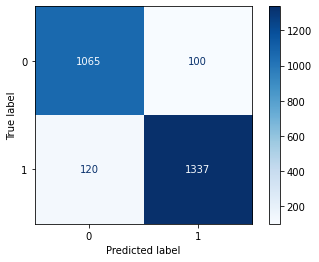

In [615]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipeline,x_test,y_test,cmap="Blues")

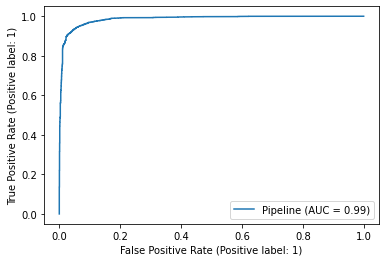

In [616]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pipeline,x_train,y_train)

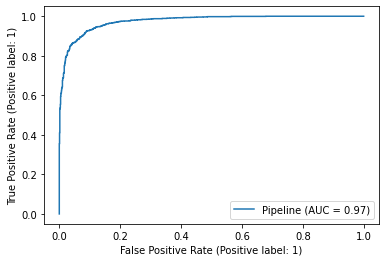

In [617]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pipeline,x_test,y_test)

**Using a single feature,but did not get the same results** 

In [627]:
x=df[['Language']]
y=df["Class"]

In [628]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y)

In [629]:
pipeline=Pipeline([('std',StandardScaler()),('clf',SVC())])
pipeline.fit(x_train,y_train)
pipeline.score(x_test,y_test)

0.7109077040427155

The combination of all the features working better to predict the target.SVM gives the best result. It is because SVMs can handle non-linearly separable data.SVMs find a hyperplane that separates the data into classes by maximizing the margin between the classes which could be the reason it performed well also if we try tuning the parameters may give better results.